# Advent of Code 2022
## [Day 8: Treetop Tree House](https://adventofcode.com/2022/day/8)

In [1]:
import aocd
input_data = aocd.get_data(year=2022, day=8).split("\n")

In [2]:
from pathlib import Path
import sys
if str(Path('../..').resolve()) not in sys.path:
    sys.path.insert(0, str(Path('../..').resolve()))

from aoc_lib import array_to_png

array([[2, 0, 2, ..., 0, 1, 0],
       [0, 2, 1, ..., 0, 0, 0],
       [0, 2, 2, ..., 1, 1, 0],
       ...,
       [0, 2, 0, ..., 0, 2, 0],
       [2, 1, 2, ..., 0, 2, 1],
       [0, 1, 2, ..., 2, 0, 1]])
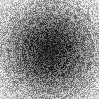

In [3]:
import numpy as np
height = np.array([[*map(int, list(line))] for line in input_data])
height

### Part 1

In [4]:
def mask_visible(row):
    mask = np.zeros_like(row, dtype=bool)
    mask[0] = 1
    for i in range(1, len(row)):
        max_seen = row[mask].max()
        if row[i] > max_seen:
            mask[i] = 1
    return mask.astype(int)

np.flip(mask_visible(height[:,0]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [5]:
def mask_all_visible(row):
    return mask_visible(row) | np.flip(mask_visible(np.flip(row)))
    
mask_all_visible(height[:,0])

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])
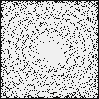

In [6]:
def mask_all_rows(grid):
    return np.array([mask_all_visible(row) for row in grid])

def mask_all_rows_cols(grid):
    return mask_all_rows(grid) | (mask_all_rows(grid.T).T)

mask_all_rows_cols(height)

#### Part 1 Answer
Consider your map; **how many trees are visible from outside the grid?**

In [7]:
mask_all_rows_cols(height).sum()

1840

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1],
       [1, 1, 0, 1, 1],
       [1, 0, 1, 0, 1],
       [1, 1, 1, 1, 1]])
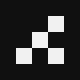

In [8]:
test_data = np.array([
    [3,0,3,7,3],
    [2,5,5,1,2],
    [6,5,3,3,2],
    [3,3,5,4,9],
    [3,5,3,9,0]
])
mask_all_rows_cols(test_data)

### Part 2

In [9]:
def scenic_mask(grid, row, col):
    mask = np.zeros_like(grid, dtype=bool)
    mask[(row,col)] = 1
    max_seen = grid[mask].max()
    
    c = col
    while c >= 0 and grid[row,c] < max_seen:
        c = c - 1
        # grid[

In [10]:
def scene_to_right(grid, row, col):
    max_seen = grid[row, col]
    distance = 0
    for c in range(col+1, grid.shape[1]):
        distance += 1
        if grid[row, c] >= max_seen:
            break
    return distance
        
scene_to_right(test_data, 1, 2)

2

In [11]:
scene_to_right(np.flip(test_data), 1, 3)

1

In [12]:
def scene_4ways(grid, row, col):
    return [
        scene_to_right(grid, row, col),
        scene_to_right(np.flip(grid, axis=1), row, grid.shape[1]-1-col),
        scene_to_right(grid.T, col, row),
        scene_to_right(np.flip(grid.T, axis=1), col, grid.shape[0]-1-row)
    ]

scene_4ways(test_data, 3,2)

[2, 2, 1, 2]

In [13]:
def scenic_score(grid, row, col):
    return np.product(scene_4ways(grid,row,col))

scenic_score(test_data, 3,2)

8

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   3,   1, ...,   1,   1,   0],
       [  0,   4,  20, ...,   4,   2,   0],
       ...,
       [  0, 100,   1, ...,   1,   6,   0],
       [  0,   1,  40, ...,   1,   4,   0],
       [  0,   0,   0, ...,   0,   0,   0]])
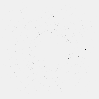

In [14]:
def all_scenic_scores(grid):
    scores = np.zeros_like(grid)
    for row in range(height.shape[0]):
        for col in range(height.shape[1]):
            scores[row][col] = scenic_score(grid, row, col)
    return scores
        
all_scenic_scores(height)

#### Part 2 Answer
Consider each tree on your map. **What is the highest scenic score possible for any tree?**

In [15]:
all_scenic_scores(height).argmax()

4936